In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import zipfile
with zipfile.ZipFile("drive/My Drive/archive.zip","r") as zip_ref:
    zip_ref.extractall("CGAS_Project_dataset")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import cv2
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
# Import different classifiers
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage.feature import hog, local_binary_pattern
import sklearn.preprocessing as prp
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import * 
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import os 
import shutil 
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
labels=os.listdir('/content/CGAS_Project_dataset/data/food-101-tiny/train')
print(labels)

['ice_cream', 'apple_pie', 'tiramisu', 'sushi', 'ramen', 'cannoli', 'bibimbap', 'falafel', 'edamame', 'french_toast']


1500
1500
           Images        Class
0     1472519.jpg     ice_crea
1     1710501.jpg     ice_crea
2     1533825.jpg     ice_crea
3      118126.jpg     ice_crea
4     1436130.jpg     ice_crea
...           ...          ...
1495   107493.jpg  french_toas
1496  1173081.jpg  french_toas
1497  1560353.jpg  french_toas
1498  1367301.jpg  french_toas
1499  1025962.jpg  french_toas

[1500 rows x 2 columns]
500
500
          Images        Class
0    1671793.jpg     ice_crea
1    1100243.jpg     ice_crea
2     172466.jpg     ice_crea
3    1176281.jpg     ice_crea
4    1382660.jpg     ice_crea
..           ...          ...
495  1497156.jpg  french_toas
496   145730.jpg  french_toas
497   139757.jpg  french_toas
498  1100950.jpg  french_toas
499  1427833.jpg  french_toas

[500 rows x 2 columns]


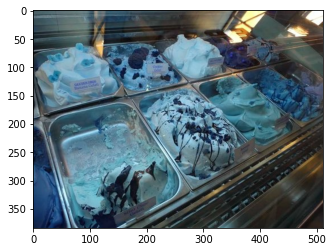

In [ ]:
labels_dict={}
train_images=[]
path='/content/CGAS_Project_dataset/data/food-101-tiny/train'
for folders in os.walk(path):
	loc=folders[0].rfind('/')
	class_name=folders[0][loc+1:-1:1]
	for img in folders[2]:
		labels_dict[img]=class_name
		#print(folders[0]+'/'+img)
		#print(cv2.imread(path+folders[0]+img))
		train_images.append(cv2.imread(folders[0]+'/'+img))

#print(labels)
print(len(labels_dict))
print(len(train_images))
labels=pd.DataFrame(labels_dict.items(),columns=['Images','Class'])

plt.imshow(train_images[0])
print(labels)


labels_dict1={}
test_images=[]
path='/content/CGAS_Project_dataset/data/food-101-tiny/valid'
for folders in os.walk(path):
	loc=folders[0].rfind('/')
	class_name=folders[0][loc+1:-1:1]
	for img in folders[2]:
		labels_dict1[img]=class_name
		#print(folders[0]+'/'+img)
		#print(cv2.imread(path+folders[0]+img))
		test_images.append(cv2.imread(folders[0]+'/'+img))

#print(labels)
print(len(labels_dict1))
print(len(test_images))
test_labels=pd.DataFrame(labels_dict1.items(),columns=['Images','Class'])

plt.imshow(test_images[0])


print(test_labels)

In [ ]:
train_images_hsv=[cv2.cvtColor(img,cv2.COLOR_BGR2HSV) for img in train_images]
test_images_hsv=[cv2.cvtColor(img,cv2.COLOR_BGR2HSV) for img in test_images]

train_images_gray=[cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in train_images]
test_images_gray=[cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) for img in test_images]

train_images=np.array(train_images)
test_images=np.array(test_images)
train_images_gray=np.array(train_images_gray)
test_images_gray=np.array(test_images_gray)


In [ ]:

def get_color_hist(images, name='color_hist'):
    histograms = []
    for img in images:
        histograms.append(cv2.calcHist([img], [0, 1, 2],None, [8, 8, 8], [0, 256, 0, 256, 0, 256]).flatten())
    
    result = np.array(histograms)
    return result

def get_hog(train_images_temp,test_images_temp,name='hog'):
  hog_features_train=[]
  hog_features_test=[]
  for i in range(0,len(train_images_temp)):
      fd = hog(train_images_temp[i],orientations=32,pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm='L2')
      hog_features_train.append(fd)
 
  #orientations=8,pixels_per_cell=(16,16),cells_per_block=(2,2),

  for i in range(0,len(test_images_temp)):
      fd = hog(test_images_temp[i],orientations=32,pixels_per_cell=(16,16),cells_per_block=(4,4),block_norm='L2')
      hog_features_test.append(fd)
  hog_features_train=np.array(hog_features_train)
  hog_features_test=np.array(hog_features_test)
  print(hog_features_train.shape)
  print(hog_features_test.shape)
  return hog_features_train,hog_features_test

def get_surf(images, name='surf', save=False):
    # SURF descriptor for 1 image
    def get_image_surf(image, vector_size=8):
        alg = cv2.xfeatures2d.SURF_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SURF descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_surf(img)
        features.append(dsc)
    
    result = np.array(features)
        
    return result


def get_sift(images, name='sift'):
    # SIFT descriptor for 1 image
    def get_image_sift(image, vector_size=8):
        alg = cv2.xfeatures2d.SIFT_create()
        kps = alg.detect(image, None)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        
        # Making descriptor of same size
        # Descriptor vector size is 128
        needed_size = (vector_size * 128)
        if len(kps) == 0:
            return np.zeros(needed_size)
        
        kps, dsc = alg.compute(image, kps)
        dsc = dsc.flatten()
        if dsc.size < needed_size:
            # if we have less than 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
            
        return dsc
    
    # SIFT descriptor for all images
    features = []
    for i, img in enumerate(images):
        dsc = get_image_sift(img)
        features.append(dsc)

    result = np.array(features)
        
    return result

In [ ]:
train_images_hog,test_images_hog=get_hog(train_images_gray,test_images_gray)

train_images_hist=get_color_hist(train_images_hsv)
test_images_hist=get_color_hist(test_images_hsv)

# train_images_surf=get_surf(train_images_gray)
# test_images_surf=get_surf(test_images_gray)

# train_images_sift=get_sift(train_images_gray)
# test_images_sift=get_sift(test_images_gray)

# print(train_images_sift.shape)
# print(test_images_sift.shape)

# print(train_images_surf.shape)
# print(test_images_surf.shape)


# train_images_hog=prp.quantile_transform(train_images_hog)
# test_images_hog=prp.quantile_transform(test_images_hog)
# train_images_hist=prp.quantile_transform(train_images_hist)
# test_images_hist=prp.quantile_transform(test_images_hist)
# train_images_surf=prp.quantile_transform(train_images_surf)
# test_images_surf=prp.quantile_transform(test_images_surf)
# train_images_sift=prp.quantile_transform(train_images_sift)
# test_images_sift=prp.quantile_transform(test_images_sift)

# train_images_kaze=prp.quantile_transform(train_images_kaze)
# test_images_kaze=prp.quantile_transform(test_images_kaze)




print((train_images_hist.shape))
print((test_images_hist.shape))

print((train_images_hog.shape))
print((test_images_hog.shape))






In [ ]:
plt.imshow(train_images[0])

In [ ]:
model=RandomForestClassifier()
model.fit(train_images ,labels)
print(model.score(test_images,test_labels))

NameError: ignored